In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from PIL import Image
from sklearn.model_selection import train_test_split
from os import path
import datetime

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [4]:
df_test = pd.read_csv('test.csv')
df_test.columns = df_test.columns.str.lower()
df_test['file_name'] = df_test['id'].map('{:04}.jpg'.format)
print(df_test.shape)
df_test.head()

(3808, 2)


,id,file_name
0,678,0678.jpg
1,3962,3962.jpg
2,9271,9271.jpg
3,5133,5133.jpg
4,8842,8842.jpg


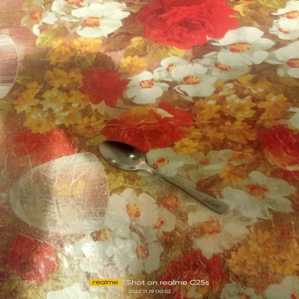

In [9]:
img = Image.open('images/0678.jpg').resize((299,299))
img

In [16]:
img = img.resize((299, 299))
arr = np.array(img, dtype='float64')
arr = np.array([arr])
arr = preprocess_input(arr)

In [17]:
model = keras.models.load_model('inception_model.h5')
model.summary()

2022-12-22 13:23:55.935030: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-22 13:23:55.984045: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 250)               512250    
                                                                 
 dropout_2 (Dropout)         (None, 250)               0         
                                                                 
 dense_5 (Dense)             (None, 6)                 1506      
                                                                 
Total params: 22,316,540
Trainable params: 513,756
Non-trainable params: 21,802,784
____________________________________

In [18]:
classes = np.array(['cup', 'fork', 'glass', 'knife', 'plate', 'spoon'])

In [81]:
y_pred = model.predict(arr)[0]

In [82]:
y_pred

array([-2.8400016,  2.616596 , -2.1855006,  1.7091666, -2.57218  ,
        8.592558 ], dtype=float32)

In [ ]:
from tensorflow.nn import softmax

In [83]:
class_proba = tf.nn.softmax(y_pred).numpy().round(3)
class_proba

array([0.   , 0.003, 0.   , 0.001, 0.   , 0.996], dtype=float32)

In [94]:
{cl:proba for cl,proba in zip(classes, class_proba) if proba>0}

{'fork': 0.003, 'knife': 0.001, 'spoon': 0.996}

In [80]:
results = pd.Series(class_proba, index=classes).sort_values(ascending=False)
results[results > 0].astype(str).to_dict()

{'spoon': '0.996', 'fork': '0.003', 'knife': '0.001'}

In [76]:
results.astype(str)

spoon    0.996
fork     0.003
knife    0.001
cup        0.0
glass      0.0
plate      0.0
dtype: object

In [27]:
predictions = classes[y_pred.argmax(axis=1)]
predictions

array(['spoon'], dtype='<U5')

In [48]:
{classes[i]:class_proba[i] for i in range(len(classes))}

{'cup': 1.0797856e-05,
 'fork': 0.0025299273,
 'glass': 2.077704e-05,
 'knife': 0.0010209779,
 'plate': 1.4114036e-05,
 'spoon': 0.99640346}

In [51]:
{c:p for c,p in zip(classes, class_proba.round(3))}

{'cup': 0.0,
 'fork': 0.003,
 'glass': 0.0,
 'knife': 0.001,
 'plate': 0.0,
 'spoon': 0.996}